Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [20]:
import tensorflow as tf

**Gradient**

Możliwe jest wyliczenie gradientu dowolnego wyrażenia różniczkowalnego. Wykorzystujemy do tego metodę **tf.GradientTape()**


Funkcja **jednej zmiennej**:

In [ ]:
x = tf.Variable(4.0)

with tf.GradientTape() as tape:
    f = x**3                     #definicja funkcji f(x)=x^3
    df_dx = tape.gradient(f, x)  #gradient 'f' ze względu na zmienną 'x'

df_dx.numpy()

48.0

Funkcja **dwóch zmiennych**:

In [ ]:
x = tf.Variable(4.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    f = x**3+y**2                         #definicja funkcji f(x,y)=x^3+y^2 
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x' i ze względu na zmienną 'x'

print(df_dx)
print(df_dy)

tf.Tensor(48.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


Przykład z **prezentacji**:

In [ ]:
x = tf.Variable(3.0)
y = tf.Variable(2.0)

with tf.GradientTape() as tape:
    f = (x**2)*y                          #definicja funkcji f(x,y)=x^2*y 
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x' i ze względu na zmienną 'x'

print(df_dx)
print(df_dy)

tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(9.0, shape=(), dtype=float32)


Trochę skomplikujemy:

In [ ]:
x = tf.Variable([3.0,2.0])

with tf.GradientTape() as tape:
    f = (x**3)                  #definicja funkcji f(x)=x^3 
    df_dx = tape.gradient(f,x)  #gradient 'f' ze względu na zmienną 'x'

print(df_dx)

tf.Tensor([27. 12.], shape=(2,), dtype=float32)


I jeszcze trochę skomplikujemy:

In [ ]:
x = tf.Variable([3.0,2.0])
y = tf.Variable([1.0,0.0])

with tf.GradientTape() as tape:
    f = (x**3)+y**2                       #definicja funkcji f(x)=x^3+y^2 
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x'

print(df_dx)
print(df_dy)

tf.Tensor([27. 12.], shape=(2,), dtype=float32)
tf.Tensor([2. 0.], shape=(2,), dtype=float32)


Zmienne mogą być zastąpione przez tensory, wówczas konieczne jest **rejestrowanie wprost** operacji zastosowanych do tych sensorów. Służy do tego metoda **watch()**. W przypkadku zmiennych operacje są rejestrowane automatycznie.

In [ ]:
x = tf.random.normal([2])
y = tf.random.normal([2])

print(x)
print(y)
print("")

with tf.GradientTape() as tape:
    tape.watch(x)
    tape.watch(y)
    f = (x**3)+y**2                       #definicja funkcji f(x)=x^3+y^2 
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x'

print(df_dx)
print(df_dy)

tf.Tensor([ 0.5899918 -1.3989412], shape=(2,), dtype=float32)
tf.Tensor([-1.1552613   0.48971453], shape=(2,), dtype=float32)

tf.Tensor([1.044271 5.871109], shape=(2,), dtype=float32)
tf.Tensor([-2.3105226   0.97942907], shape=(2,), dtype=float32)


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
number_of_points = 1000
x_point = []
y_point = []

In [ ]:
a = 0.22
b = 0.78

In [ ]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

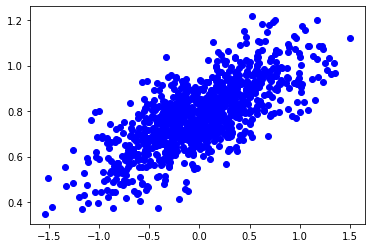

In [ ]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [ ]:
real_x = np.array(x_point)
real_y = np.array(y_point)

Definicja błędu:

In [ ]:
x = tf.constant([1.0, 2.0, 3.0, 4.0])
tf.reduce_mean(x)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [ ]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [ ]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [ ]:
Loss = []
epochs = 50

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(0.1*dloss_da)
  b.assign_sub(0.1*dloss_db)

In [ ]:
np.max(Loss),np.min(Loss)

(0.040465012, 0.010614281)

In [ ]:
print(a.numpy())
print(b.numpy())

0.20191799
0.7786026


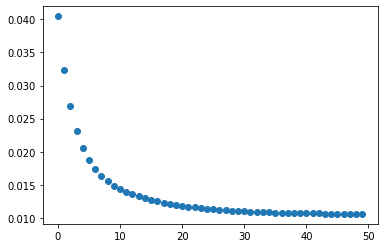

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [ ]:
max = np.max(x_point)
min = np.min(x_point)

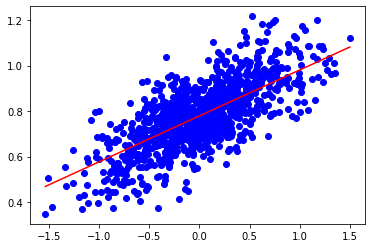

In [ ]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()

**zad.1 a)**

In [ ]:
x = tf.Variable(4.0)

with tf.GradientTape() as tape:
    f = ((2*x) ** 2) + 3*x + 4                    
    df_dx = tape.gradient(f, x)  

df_dx.numpy()

35.0

**b)**

In [ ]:
x = tf.Variable(4.0)
y = tf.Variable(5.0)

with tf.GradientTape() as tape:
    f = ((2*x) ** 3) + ((3*y) ** 2) + 4                     
    df_dx, df_dy = tape.gradient(f, (x,y))  

print(df_dx)
print(df_dy)

tf.Tensor(384.0, shape=(), dtype=float32)
tf.Tensor(90.0, shape=(), dtype=float32)


**c)**

In [ ]:
x = tf.constant([1.0, 3.0])
y = tf.constant([2.0, 1.0])

print(x)
print(y)
print("")

with tf.GradientTape() as tape:
    tape.watch(x)
    tape.watch(y)
    f = ((2*x) ** 3) + ((3*y) ** 2) + 4                      
    df_dx,df_dy = tape.gradient(f,(x,y)) 

print(df_dx)
print(df_dy)

tf.Tensor([1. 3.], shape=(2,), dtype=float32)
tf.Tensor([2. 1.], shape=(2,), dtype=float32)

tf.Tensor([ 24. 216.], shape=(2,), dtype=float32)
tf.Tensor([36. 18.], shape=(2,), dtype=float32)


**zad.2**

tf.Tensor(384.0, shape=(), dtype=float32)
tf.Tensor(90.0, shape=(), dtype=float32)
-------------------------------
tf.Tensor(96.0, shape=(), dtype=float32)
tf.Tensor(54.0, shape=(), dtype=float32)
-------------------------------
tf.Tensor(24.0, shape=(), dtype=float32)
tf.Tensor(36.0, shape=(), dtype=float32)
-------------------------------
tf.Tensor(600.0, shape=(), dtype=float32)
tf.Tensor(126.0, shape=(), dtype=float32)


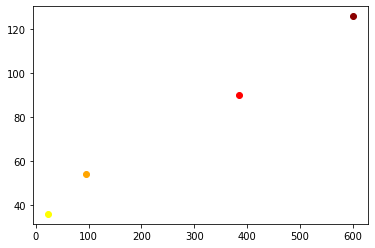

In [ ]:
import matplotlib.pyplot as plt

# 1) (4,5)
x = tf.Variable(4.0)
y = tf.Variable(5.0)

with tf.GradientTape() as tape:
    f = (2*x) ** 3+(3*y) ** 2+4                   
    df_dx,df_dy = tape.gradient(f, (x,y))  

print(df_dx)
print(df_dy)
plt.scatter(df_dx, df_dy, c = "red")
print("-------------------------------")

# 2) (2,3) -> decrease
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    f = (2*x) ** 3+(3*y) ** 2+4                   
    df_dx,df_dy = tape.gradient(f, (x,y))  

print(df_dx)
print(df_dy)
plt.scatter(df_dx, df_dy, c = "orange")
print("-------------------------------")

# 3) (1,2) -> decrease
x = tf.Variable(1.0)
y = tf.Variable(2.0)

with tf.GradientTape() as tape:
    f = (2*x) ** 3+(3*y) ** 2+4                   
    df_dx,df_dy = tape.gradient(f, (x,y))  

print(df_dx)
print(df_dy)
plt.scatter(df_dx, df_dy, c = "yellow")
print("-------------------------------")
#plt.show()

# 4) (5,7) -> increase
x = tf.Variable(5.0)
y = tf.Variable(7.0)

with tf.GradientTape() as tape:
    f = (2*x) ** 3+(3*y) ** 2+4                   
    df_dx,df_dy = tape.gradient(f, (x,y))  

print(df_dx)
print(df_dy)
plt.scatter(df_dx, df_dy, c = "#8b0000") # dark red color

plt.show()

**zad.3**

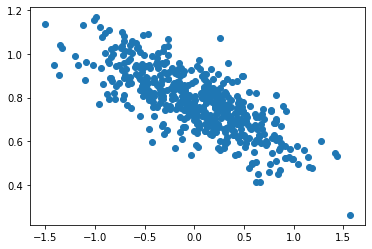

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

number_of_points = 500
x_point = []
y_point = []

a = 0.22 
b = 0.78

for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (-a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

plt.scatter(x_point,y_point,c='tab:blue')
plt.show()

-0.18407144
0.7833143


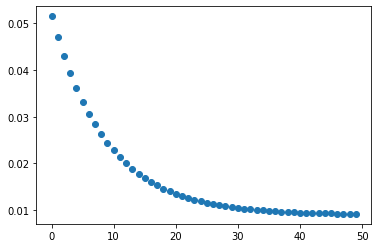

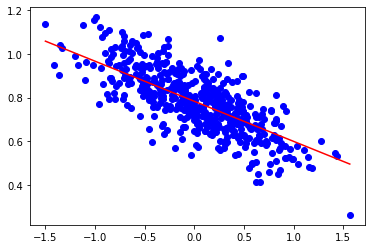

In [ ]:
real_x = np.array(x_point)
real_y = np.array(y_point)

# Definicja błędu:

x = tf.constant([1.0, 2.0, 3.0, 4.0])
tf.reduce_mean(x)

def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

Loss = []
epochs = 50

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(0.1*dloss_da)
  b.assign_sub(0.1*dloss_db)

np.max(Loss),np.min(Loss)

print(a.numpy())
print(b.numpy())

plt.scatter(np.arange(epochs),Loss)
plt.show()

max = np.max(x_point)
min = np.min(x_point)

X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()

**zad.4**

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
os.chdir('/content/drive/My Drive/DM')

Mounted at /content/drive


In [38]:
data = pd.read_csv('Boston.csv')
print(data)

rm = data['rm']
medv = data['medv']

     Unnamed: 0     crim    zn  indus  chas  ...  tax  ptratio   black  lstat  medv
0             1  0.00632  18.0   2.31     0  ...  296     15.3  396.90   4.98  24.0
1             2  0.02731   0.0   7.07     0  ...  242     17.8  396.90   9.14  21.6
2             3  0.02729   0.0   7.07     0  ...  242     17.8  392.83   4.03  34.7
3             4  0.03237   0.0   2.18     0  ...  222     18.7  394.63   2.94  33.4
4             5  0.06905   0.0   2.18     0  ...  222     18.7  396.90   5.33  36.2
..          ...      ...   ...    ...   ...  ...  ...      ...     ...    ...   ...
501         502  0.06263   0.0  11.93     0  ...  273     21.0  391.99   9.67  22.4
502         503  0.04527   0.0  11.93     0  ...  273     21.0  396.90   9.08  20.6
503         504  0.06076   0.0  11.93     0  ...  273     21.0  396.90   5.64  23.9
504         505  0.10959   0.0  11.93     0  ...  273     21.0  393.45   6.48  22.0
505         506  0.04741   0.0  11.93     0  ...  273     21.0  396.90   7.8

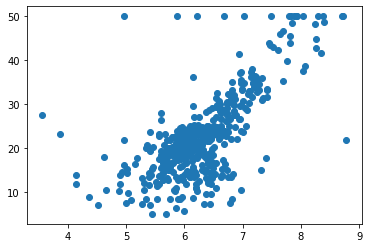

In [39]:
plt.scatter(rm, medv, c='tab:blue')
plt.show()

epochs: 1000 and learning_rate: 0.0001 

3.526375
0.792127


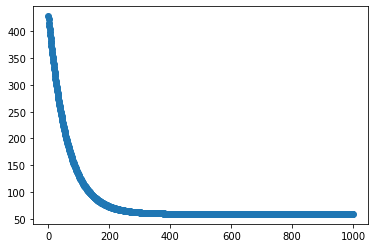

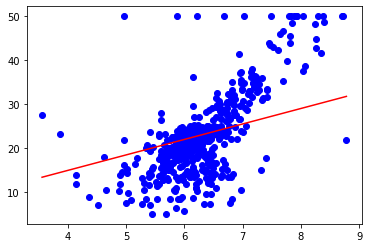

In [70]:
real_x = np.array(rm)
real_y = np.array(medv)

# Definicja błędu:
x = tf.constant([1.0, 2.0, 3.0, 4.0])
tf.reduce_mean(x)

def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

Loss = []
epochs = 1000
learning_rate = 0.0001
# zmniejszamy "learning_rate"
print("epochs:", epochs, "and learning_rate:", learning_rate, "\n")

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*dloss_da)
  b.assign_sub(learning_rate*dloss_db)

np.max(Loss),np.min(Loss)

print(a.numpy())
print(b.numpy())

plt.scatter(np.arange(epochs),Loss)
plt.show()

max = np.max(rm)
min = np.min(rm)

X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(rm,medv,c="b")
plt.show()